In [4]:
import torch
from torch.autograd import Variable as V
import torchvision.transforms as T

import cv2
import skimage.io as io
# import skimage.filter
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mimg

from configs import generator_cfg, trainer_cfg
from helpers import Converter, affineT
from models import crnn

# uncomment after run generate.py
# datafile = pd.read_csv('./data/data.csv', sep=';', header=None)

%matplotlib inline

from generator import generate
from configs import generator_cfg
import random

In [5]:
t_cfg = trainer_cfg()
d_cfg = generator_cfg()
cvrt = Converter(d_cfg.alph, ignore_case=False)

In [6]:
print(d_cfg.alph)


!"&',-.0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz


In [28]:
def _predict(model, text, gt):
    if isinstance(text, str):
        img = io.imread(fname)
    else:
        img = np.asarray(text)
    # img -= mean
    # img /= std
    img = cv2.resize(img, (128, 32))
    img = np.moveaxis(img, -1, 0)
    img = np.expand_dims(img, 0)
    Y = model(V(torch.from_numpy(img).float().to(device)))
    ret = cvrt.decode_probs(Y)
    if ret.lower() == gt.lower():
        return True, ret, gt
    else:
        return False, ret, gt

In [148]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if device == "cuda":
    model = torch.load('./ckpts/model_.pt').to(device)
else:
    model = torch.load('./ckpts/model_.pt', map_location="cpu")

In [77]:
text = 'Gentoo'
img = generate(text=text, font=random.choice(d_cfg.fonts), text_color='black', font_size=33, space_width=2)
img#.resize(128, 32)

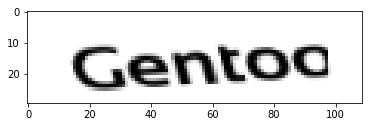

In [78]:
img = affineT(img)
plt.imshow(img)

In [79]:
_predict(model, img, text)

(True, 'Gentoo', 'Gentoo')

In [81]:
vk = generate(text='VK.com', font=random.choice(d_cfg.fonts), text_color='blue', font_size=33, space_width=2.5)
vk

In [82]:
_predict(model,vk, 'VK.com')

(True, 'VK.com', 'VK.com')

<PIL.Image.Image image mode=RGB size=122x33 at 0x7F2D9469D2E8>
(False, 'one-Twc', 'one-Two')


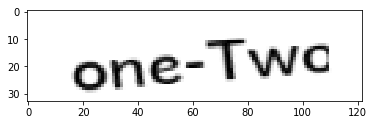

In [116]:
text = 'one-Two'
img = generate(text=text, font=random.choice(d_cfg.fonts), text_color='black', font_size=33, space_width=2)
print(img)#.resize(128, 32)
img = affineT(img)
plt.imshow(img)
print(_predict(model, img, text))

(False, 'abdicant', 'felt-shod')


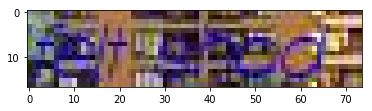

In [205]:
# idx=23
# print(_predict(model, fnames[fp[idx]], gt[fp[idx]]))
# plt.imshow(io.imread(fnames[fp[idx]]))

In [437]:
with open('./misc/dicts/en.txt', 'r') as f:
    d = f.readlines()

In [ ]:
dd = dict()
for idx, c in enumerate(d_cfg.alph):
    dd[c] = idx

In [456]:
stats = np.zeros((len(d_cfg.alph))).astype(np.uint8)

In [457]:
for l in d:
    for c in l:
        col = dd[c]
        stats[col] += 1

In [482]:
def count_elements(seq):
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

def old_hist(seq):
    counted = count_elements(seq)
    for k in sorted(counted):
        print('{0:5s} {1}'.format(k, '+' * counted[k]))

In [480]:
dat = []
for f, v in zip(stats, d_cfg.alph):
    dat.extend([v] * int(f/5))

In [483]:
old_hist(dat)


     +++++++++
&     +
'     +++++++++++++++++++++++++
-     +++++++++++++
.     ++++++++++++++++++++++++++++++++++++++++++++++++
0     +
1     ++++++
2     ++++
3     ++
4     ++
5     +
6     +
8     +
9     +
B     +++++++++++++++++++++++++++++++++++++++++
C     +++++++++++++++++++++++++++++++++++++++++
D     ++++++++++++++++++
E     ++++++++++++++
F     ++++++++++++++++++++++++++++++++++++++++++++
G     +++++
H     ++++++++++++++++++++++++++++++++++++++++++++++++
I     ++++++++++++++++++++++++
J     ++++++++++++++++++++++++++++++++++
K     +++++++++++++++++++++++++++++++++++
L     +++++++++++++++++++++++++++++++++++++++++++
M     ++++++++++++++++++++++++++++++++++++++++
N     ++++++++++++++++++++++++
O     +++++++++++++++++++++++++++++++++++++++++++++++++
P     ++++++++++++++
Q     ++++++++++++++++++++
R     ++++++
S     +++++++++++++++++++++++++++++++++++++++++++++++++
U     +++++++++++++++++++++++++++++++++++++++
V     ++++++++++++++++
W     ++++++++++++++++++++++++++++++++
X   